# *DSHARP* Mie Opacities

### Introduction

This notebook carries out some tests or comparison for the opacity tool of the DSHARP project. 

**Note:** All parts have their own `import` statements. This allows running those parts of the notebook separately.

For creating the DHSARP opacities discussed in Birnstiel et al. 2018, see the notebook [`smoothed_opacities.ipynb`](smoothed_opacities.ipynb).

### The Code

To install the DSHARP opacity package you can download code from [github](https://github.com/birnstiel/dsharp_opac), change into that directory, and install the package with the command

    pip install -e .
    
Alternatively it can be installed from the python package index be running

    pip install dsharp_opac

### Outline

- [**Part 1**](##Part-1%3A-Optical-Constants-%26amp%3B-Composition) Discusses origin of optical constants and composition with references.
- [**Part 2**](##Part-2%3A-DSHARP-Opacities) reads the pre-computed opacities.
- [**Part 3**](#Part-3:-Comparison-to-Ricci-et-al.-2010) recreates the opacities in [Ricci et al. 2010](https://dx.doi.org/10.1051/0004-6361/200913403)
- [**Part 4**](#Part-4:-Comparison-to-Draine-opacities) tests our Mie implementation to reproduce the astronomical silicates opacities by [Draine & Lee 1984](https://doi.org/10.1086/162480)
- [**Part 5**](#Part-5:-Test-large-grain-extrapolation) tests the extrapolation that can be used to speed up the calculations in the geometric optics limit.
- [**Part 6**](#Part-6:-Large-Opacity-Values) compares the default mix from [Ricci et al. 2010](https://dx.doi.org/10.1051/0004-6361/200913403), but varies the compactness & mixing rule.
- [**Part 7**](#Part-7:-Bruggeman-Test) tests the Bruggeman mixing and compares to Maxwell-Garnett.
- [**Part 8**](#Part-8:-Kataoka-Opacities) tries to reproduce the results from [Kataoka et al. 2014](https://dx.doi.org/10.1051/0004-6361/201323199).
- [**Part 9**](#Part-9:-Carbonaceous-Dust-and-Water) shows the huge variations for carbonaceous material and less variation for water ice.

------------------------------------------
## Part 1: Optical Constants & Composition

Here we follow [D'Alessio et al. 2001](https://dx.doi.org/10.1086/320655) and [Pollack et al. 1994](https://doi.org/10.1086/173677). For the optical constants, we use the ones provided by [Thomas Henning](http://www2.mpia-hd.mpg.de/home/henning/Dust_opacities/Opacities/RI/old_ri.html) for Troilite and organics. For water ice we use [Warren & Brandt (2008)](https://dx.doi.org/10.1029/2007JD009744), for astronomical silicates we use the constants provided by [Draine 2003](https://dx.doi.org/10.1086/379123). We compare a mass-weighted average to the EMT mixing rules. Below, the literature compositions are noted together with the values that we use.

#### Values Stated in [Pollack et al. 1994](https://doi.org/10.1086/173677)

$\bar\rho$ = 1.3785 g/cc


| Species            | Bulk Density [g/cm^3] | mass fraction total | mass fraction normalized | volume fraction |
|:-------------------|:----------------------|:--------------------|:-------------------------|:----------------|
| Metallic iron      | 7.87                  | 1.26e-4             | 0.00900901               | 0.00157800      |
| Olivine            | 3.49                  | 2.64e-3             | 0.18876019               | 0.07455709      |
| Orthopyroxene      | 3.40                  | 7.70e-4             | 0.05505506               | 0.02232144      |
| Troilite           | 4.83                  | 7.68e-4             | 0.05491205               | 0.01567200      |
| Refractory organic | 1.50                  | 3.53e-3             | 0.25239525               | 0.23194974      |
| Volatile organic   | 1.00                  | 6.02e-4             | 0.04304304               | 0.05933445      |
| Water ice          | 0.92                  | 5.55e-3             | 0.39682540               | 0.59458728      |

#### Values stated in [D'Alessio et al. 2001](https://dx.doi.org/10.1086/320655)

$\bar\rho$ = 1.385 g/cm$^3$

| Species                | References | $\rho$ [g/cm^3] | mass fract. [tot.] | mass fraction [norm.] | vol. fraction |
|:-----------------------|:-----------|:----------------|:-------------------|:----------------------|:--------------|
| Water ice              | [[1]](#1)  | 0.92            | 0.0056             | 0.4038                | 0.6081        |
| Astronomical Silicates | [[2]](#2)  | 3.30            | 0.0034             | 0.2452                | 0.1029        |
| Troilite               | [[3]](#3)  | 4.83            | 0.000768           | 0.0554                | 0.0159        |
| Refractory organic     | [[4]](#4)  | 1.50            | 0.0041             | 0.2956                | 0.2730        |

#### DSHARP Values

Based on the discussion in [D'Alessio et al. 2006](https://doi.org/10.1088/0004-637X/717/1/441) (who reduced the water abundance by 90%) we also reduce the water abundance, however down to values as measured in comets. These suggest values as low as 20% water mass fraction ([Pätzold et al. 2016](https://dx.doi.org/10.1038/nature16535)).

$\bar\rho$ = 1.6686 g/cm$^3$


| Species                | mass fraction [norm.] | vol. fraction |
|:-----------------------|:---------------------:|:--------------|
| Water ice              | 0.2000                | 0.3642        |
| Astronomical Silicates | 0.3291                | 0.1670        |
| Troilite               | 0.0743                | 0.0258        |
| Refractory organic     | 0.3966                | 0.4430        |

[1]<a name="1"></a>: [D'Alessio et al. 2001](https://dx.doi.org/10.1086/320655) used the constants from Warren (1984), the data in [Henning & Stognienko 1996](http://adsabs.harvard.edu/abs/1996A%26A...311..291H) comes from Hudgins et al. (1993, at 100 K, amorphous ice) between 2.5 and 200 $\mu$m, from P94 for the rest. These are measured for different phases, but the differences are small. We will be using the more recent data from [Warren & Brandt (2008)](https://dx.doi.org/10.1029/2007JD009744).

[2]<a name="2"></a>:
[D'Alessio et al. 2001](https://dx.doi.org/10.1086/320655) used constant $k$ value for $\lambda > 800\,\mu$m. [Henning & Stognienko 1996](http://adsabs.harvard.edu/abs/1996A%26A...311..291H) argue (their section 5.1) that $k\propto \lambda^{-1}$ is usually assumed, but Campbell & Ulrichs (1969) measured a high value of $k$ (0.05 at 2.7 mm). We are using the opacities from [Draine 2003](https://dx.doi.org/10.1086/379123) without changes.

[3]<a name="3"></a>: Troilite (new): measurements vom 10 - 500 $\mu$m are from Begemann et al. (1994), short- and long wavelength follow P94, fitting well to Begemann et al. (1994). We use the file from T. Hennings website.

[4]<a name="4"></a>: Organics (new): Kramers-Kronig analysis show very little changes compared to P94. We use the file from T. Hennings website.

Imports for this part:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

import dsharp_opac as opacity
plt.style.use(['seaborn-ticks', {'figure.dpi': 100}])

In a first step, we compare against the Pollack constants.

In [2]:
# get the optical constants

d1n = opacity.diel_henning('waterice',      new=True)
d2n = opacity.diel_henning('olivine',       new=True)
d3n = opacity.diel_henning('orthopyroxene', new=True)
d4n = opacity.diel_henning('organics',      new=True)
d5n = opacity.diel_henning('iron',          new=True)
d6n = opacity.diel_henning('troilite',      new=True)

d1o = opacity.diel_henning('waterice',      new=False)
d2o = opacity.diel_henning('olivine',       new=False)
d3o = opacity.diel_henning('orthopyroxene', new=False)
d4o = opacity.diel_henning('organics',      new=False)
d5o = opacity.diel_henning('iron',          new=False)
d6o = opacity.diel_henning('troilite',      new=False)

p_w   = opacity.diel_pollack1994('water ice')
p_ol  = opacity.diel_pollack1994('olivine')
p_op  = opacity.diel_pollack1994('orthopyroxene')
p_org = opacity.diel_pollack1994('organics')
p_i   = opacity.diel_pollack1994('iron')
p_t   = opacity.diel_pollack1994('troilite')

Reading opacities from watericek
Please cite Henning & Stognienko (1996) when using these optical constants
Reading opacities from olmg70k
Please cite Henning & Stognienko (1996) when using these optical constants
Reading opacities from pyrmg70k
Please cite Henning & Stognienko (1996) when using these optical constants
Reading opacities from organicsk
Please cite Henning & Stognienko (1996) when using these optical constants
Reading opacities from ironk
Please cite Henning & Stognienko (1996) when using these optical constants
Reading opacities from troilitek
Please cite Henning & Stognienko (1996) when using these optical constants
Reading opacities from waterice
Please cite Henning & Stognienko (1996), Pollack et al. (1994) when using these optical constants
Reading opacities from olivine
Please cite Henning & Stognienko (1996), Pollack et al. (1994) when using these optical constants
Reading opacities from orthopyr
Please cite Henning & Stognienko (1996), Pollack et al. (1994) when 

Redo [Fig. 1](http://adsbit.harvard.edu//full/1994ApJ...421..615P/0000624.000.html) from Pollack et al. 1994 paper to compare optical constants.

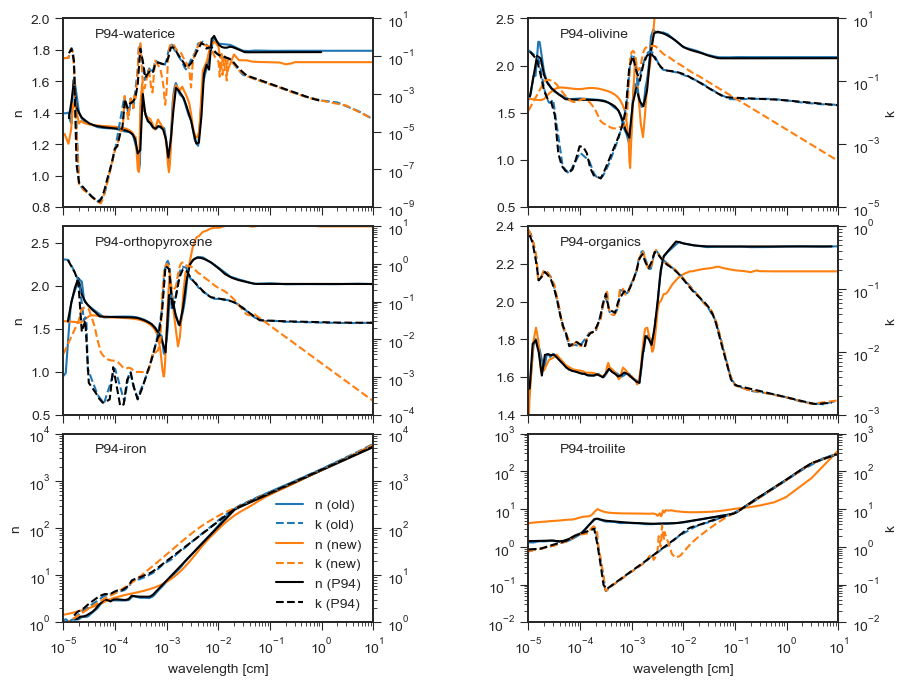

In [3]:
f, axs = plt.subplots(3,2, figsize=(10,8), sharex=True)

const_o = [d1o, d2o, d3o, d4o, d5o, d6o]
const_n = [d1n, d2n, d3n, d4n, d5n, d6n]
const_p = [p_w, p_ol, p_op, p_org, p_i, p_t]

axs = axs.ravel()
axs2 = []
for c_o, c_n, c_p, ax in zip(const_o, const_n, const_p, axs):

    # plot real part

    line1o, = ax.semilogx(c_o._l, c_o._n, '-', label='n (old)')
    line1n, = ax.semilogx(c_n._l, c_n._n, '-', label='n (new)')
    line1p, = ax.semilogx(c_p._l, c_p._n, 'k-', label='n (P94)')

    # plot imaginary part

    ax2 = ax.twinx()
    line2o, = ax2.loglog(c_o._l, c_o._k, '--', label='k (old)')
    line2n, = ax2.loglog(c_n._l, c_n._k, '--', label='k (new)')
    line2p, = ax2.loglog(c_p._l, c_p._k, 'k--', label='k (P94)')
    axs2 +=[ax2]

    # add name of the species

    ax.text(.1,.9,
            os.path.splitext(os.path.split(c_p.datafile)[1])[0].capitalize(),
            horizontalalignment='left',
            transform=ax.transAxes)

    # add legend to first panel

    if len(axs2)==5:
        lns = [line1o, line2o, line1n, line2n, line1p, line2p]
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, loc=4)

# adjust the labels

for ax in axs[:-2]:
    plt.setp(ax.get_xticklabels(), visible=False)
for ax in axs[-2:]:
    ax.set_xlabel('wavelength [cm]')
for ax in axs[0::2]:
    ax.set_ylabel('n')
for ax in axs2[1::2]:
    ax.set_ylabel('k')

# use same limits as in pollack paper

axs[0].set_ylim(0.8,2.0)
axs[1].set_ylim(0.5,2.5)
axs[2].set_ylim(0.5,2.7)
axs[3].set_ylim(1.4,2.4)
axs[4].set_ylim(1e0,1e4)
axs[4].set_yscale('log')
axs[5].set_ylim(1e-2,1e3)
axs[5].set_yscale('log')

axs2[0].set_ylim(1e-9,1e1)
axs2[1].set_ylim(1e-5,1e1)
axs2[2].set_ylim(1e-4,1e1)
axs2[3].set_ylim(1e-3,1e0)
axs2[4].set_ylim(1e-0,1e4)
axs2[5].set_ylim(1e-2,1e3)

axs[0].set_xlim(1e-5, 1e1)

f.subplots_adjust(hspace=0.1, wspace=0.5)

f.savefig('pollack_optical_constants.pdf')

------------------------------------------
## Part 2: DSHARP Opacities

Imports for this part:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pkg_resources
import dsharp_opac as opacity
plt.style.use(['seaborn-ticks', {'figure.dpi': 100}])

Loading pre-calculated opacities

In [2]:
datafile = opacity.get_datafile('default_opacities_smooth.npz')
res = np.load(datafile)

a     = res['a']
lam   = res['lam']
k_abs = res['k_abs']
k_sca = res['k_sca']
g     = res['g']
rho_s = res['rho_s']

Calculate $\beta$ as function of $a_\mathrm{max}$:

kappa_abs @       1 mm for a_max = 1mm : 2.87 cm^2/g
kappa_abs @       3 mm for a_max = 1mm : 0.462 cm^2/g


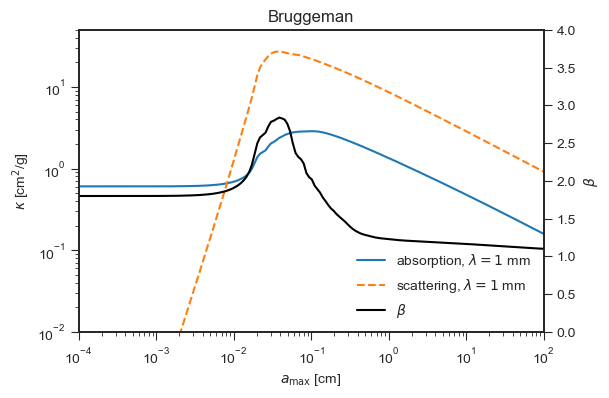

In [3]:
lam_avg =[0.1, 0.3]

r_B = opacity.size_average_opacity(lam_avg, a, lam, k_abs, k_sca, plot=True)
for i, _lam in enumerate(lam_avg):
    print('kappa_abs @ {:7.3g} mm for a_max = 1mm : {:.3g} cm^2/g'.format(_lam *10, np.interp(_lam, a, r_B['ka'][i])))
r_B['ax1'].set_title('Bruggeman')
plt.savefig('kappa_B.pdf')

Example plot: opacities at 880 µm as function of particle size

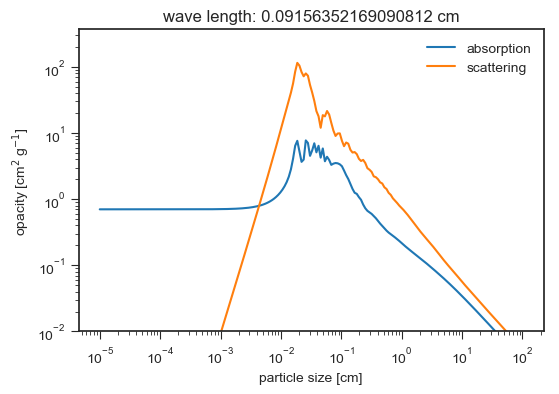

In [4]:
ilam = lam.searchsorted(0.088)
f, ax = plt.subplots()
ax.loglog(a, k_abs[:, ilam], label='absorption')
ax.loglog(a, k_sca[:, ilam], label='scattering')
ax.set_title('wave length: {} cm'.format(lam[ilam]))
ax.set_ylabel('opacity [cm$^2$ g$^{-1}$]')
ax.set_xlabel('particle size [cm]')
ax.set_ylim(ymin=1e-2)
ax.legend();

Download one of the Weingartner & Draine 2001 dust models for comparison

In [5]:
filename = 'kext_albedo_WD_MW_3.1_60'
if not os.path.isfile(filename):
    from urllib.request import urlretrieve
    print('Downloading file \'{}\' ... '.format(filename), end='')
    urlretrieve(
        'ftp://ftp.astro.princeton.edu/draine/dust/mix/{}'.format(filename),
        filename=filename)
    print('Done!')

with open(filename) as f:
    while not f.readline().startswith('--------'):
        pass
    lam_dr,_,_,_,k_dr = np.loadtxt(f).T

Reproduce the Figures 1 from Andrews et al. 2009 or D'Alessio et al. 2001.

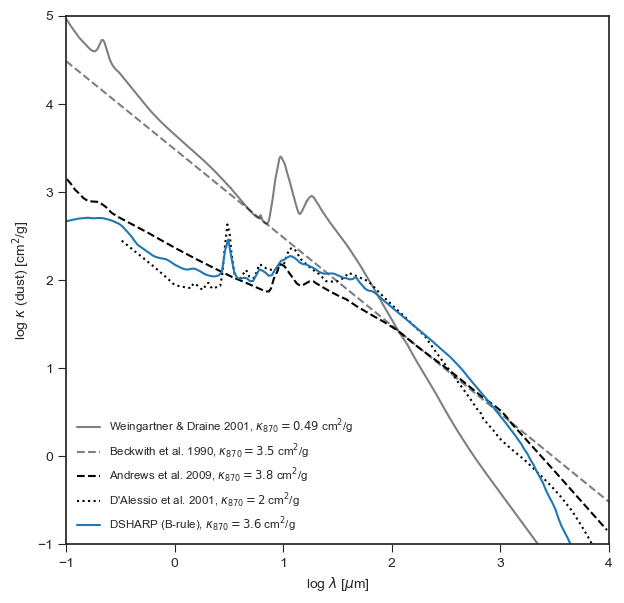

In [6]:
# a 1g-normalized size distribution (bin-integrated) up to 1 mm

s = a**0.5
s[a > 0.1] = 0
s= s / s.sum()

# size average the absorption opacities

k_B  = (k_abs * s[:,None]).sum(0)

# where to measure the reference value
lam_obs = 0.087

# load the D'Alessio opacity
d2g = sum([0.0056, 0.0034, 0.000768, 0.0041])
data_d01 = np.loadtxt(opacity.get_datafile('kappa_D01_T100K_p3.5_amax1mm.csv'))
lam_d01 = 10.**data_d01[:,0] * 1e-4
kap_d01 = 10.**(data_d01[:,1]) / d2g

# the Beckwith 1990 law

kb = 3.5 * (lam / 0.087)**(-1)  # Beckwith 1990

# the opacities from Andrews et al. 2009

la,ka = np.loadtxt(opacity.get_datafile('andrews2009.dat')).T

# now the plot

f, ax = plt.subplots(figsize=(7,7))

ax.plot(np.log10(lam_dr),      np.log10(k_dr),    'k',   zorder=-100, alpha=0.5, label='Weingartner & Draine 2001, $\kappa_{{{:.0f}}} = {:3.2g}$ cm$^2$/g'.format(lam_obs*1e4, np.interp(lam_obs*1e4,lam_dr,k_dr)))
ax.plot(np.log10(1e4*lam),     np.log10(kb),      'k--', zorder=-100, alpha=0.5, label='Beckwith et al. 1990, $\kappa_{{{:.0f}}} = {:3.2g}$ cm$^2$/g'.format(     lam_obs*1e4, np.interp(lam_obs,lam,kb)))
ax.plot(np.log10(la),          np.log10(ka),      'k--', zorder=-100, alpha=1.0, label='Andrews et al. 2009, $\kappa_{{{:.0f}}} = {:3.2g}$ cm$^2$/g'.format(      lam_obs*1e4, np.interp(lam_obs*1e4,la,ka)))
ax.plot(np.log10(1e4*lam_d01), np.log10(kap_d01), 'k:',  zorder=-100, alpha=1.0, label='D\'Alessio et al. 2001, $\kappa_{{{:.0f}}} = {:3.2g}$ cm$^2$/g'.format(   lam_obs*1e4, np.interp(lam_obs,lam_d01,kap_d01)))
ax.plot(np.log10(1e4*lam),     np.log10(k_B),            zorder=-100, alpha=1.0, label='DSHARP (B-rule), $\kappa_{{{:.0f}}} = {:3.2g}$ cm$^2$/g'.format(          lam_obs*1e4, np.interp(lam_obs,lam,k_B)))

ax.legend(loc=3, fontsize='small')
ax.set_xlim(-1,4)
ax.set_ylim(-1,5)
ax.set_xlabel('log $\lambda$ [$\mu$m]')
ax.set_ylabel('log $\kappa$ (dust) [cm$^2$/g]')
plt.savefig('fig1.pdf')

Example: calculate size averaged opacities and get absorption opacity at 1.3 mm.

for a_max = 1.0 mm, kappa_abs @ 1.25 mm = 2.0141723360779156 cm^2/g


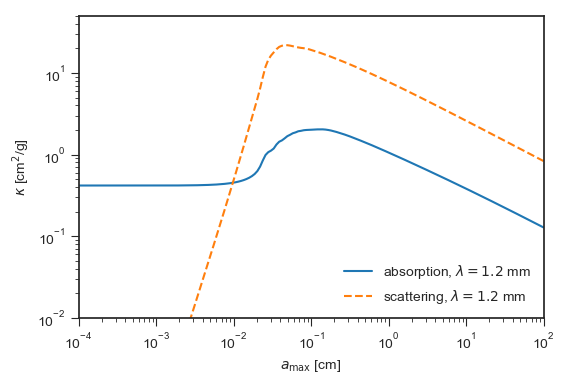

In [7]:
import dsharp_opac as opacity

lam_obs = 0.125
a_max = 0.1
res = opacity.size_average_opacity(lam_obs, a, lam, k_abs, k_sca, plot=True)

print('for a_max = {} mm, kappa_abs @ {} mm = {} cm^2/g'.format(a_max * 10, lam_obs * 10, np.interp(a_max, a, res['ka'][0, :])))

------------------------------------------
## Part 3: Comparison to Ricci et al. 2010

### Procedure

The opacity is created in the following way, following [Ricci et al. 2010](https://dx.doi.org/10.1051/0004-6361/200913403):

| Optical constants                                                                | Volume fractions [%] | material density [g/cm^3] |
|:---------------------------------------------------------------------------------|---------------------:|--------------------------:|
| Astronomical Silicates: [Draine 2003](https://dx.doi.org/10.1086/379123)         |           7          |            3.50           |
| Carbon  grains: [Zubko et al. 1996](https://dx.doi.org/10.1093/mnras/282.4.1321) |          21          |            2.50           |
| Water ice: [Warren & Brandt 2008](https://dx.doi.org/10.1029/2007JD009744)       |          42          |            1.00           |
| Vacuum                                                                           |          30          |            0.00           |

The mixing of the optical constants is done according to the Bruggeman mixing rule and the opacities are calculated using a Bohren & Huffman Mie code, more specifically a Fortran 90 translation of [Bruce Draines `bhmie.f`](https://www.astro.princeton.edu/~draine/scattering.html) code.

Imports for this part:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from pkg_resources import resource_filename

import dsharp_opac as opacity
plt.style.use(['seaborn-ticks', {'figure.dpi': 100}])

Here we create the opacities: note that the large grains at short wavelength take very long to calculate. We can use extrapolation for that by setting `extrapolate_large_grains=True` which make it very fast, but for the extreme cases ($a>1$ cm, $\lambda < 50\mu$m) this leads to a few percent error, and for the most extreme cases ($a>10$ cm, $\lambda < 0.2\mu$m) to an error of 30%.

In [2]:
a = np.logspace(-5, 2, 200)
lam = np.logspace(np.log10(6.5e-6), 0, 206)
dc, rho_s = opacity.get_ricci_mix(extrapol=True, lmax=lam[-1])

Please cite Draine 2003 when using these optical constants
Please cite Zubko et al. (1996) when using these optical constants
Please cite Warren & Brandt (2008) when using these optical constants


In [3]:
res = opacity.get_opacities(a, lam, rho_s, dc, return_all=True, extrapol=True, extrapolate_large_grains=True)

k_abs = res['k_abs']
k_sca = res['k_sca']
g     = res['g']
S1    = res['S1']
S2    = res['S2']
theta = res['theta']
rho_s = res['rho_s']

Mie ... Done!


Load Luca Riccis averaged opacity data.

In [4]:
datafile = opacity.get_datafile(os.path.join('testfiles_ricci', 'kappa.dat'), base='optical_constants')
k_ricci = np.loadtxt(datafile)
datafile = opacity.get_datafile(os.path.join('testfiles_ricci', 'beta.dat'), base='optical_constants')
beta_ricci = np.loadtxt(datafile)

Compare the averaged opacity curves

kappa_abs @       1 mm for a_max = 1mm : 11.1 cm^2/g
kappa_abs @       3 mm for a_max = 1mm : 2.1 cm^2/g


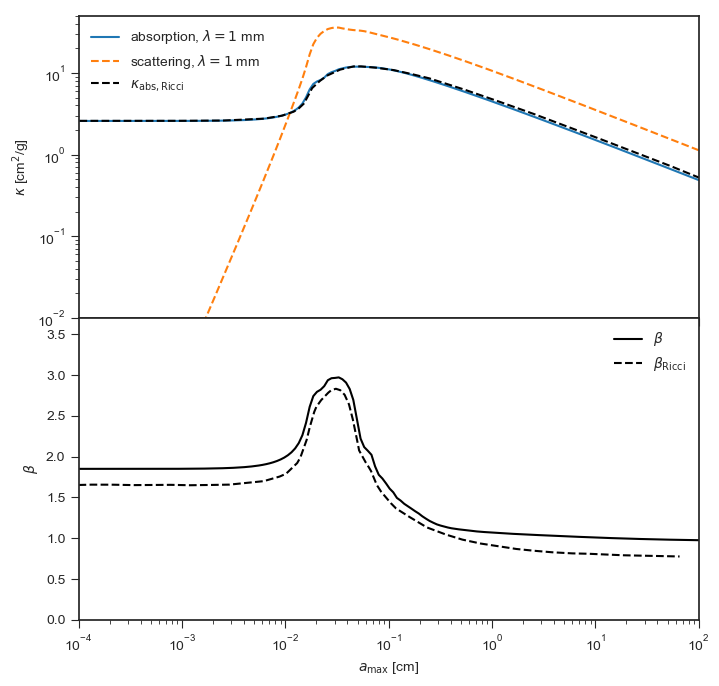

In [5]:
lam_avg = [0.1, 0.3]
f, ax = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
f.subplots_adjust(hspace=0)

res = opacity.size_average_opacity(lam_avg, a, lam, k_abs, k_sca, plot=True, ax=ax)

for ilam, _lam in enumerate(lam_avg):
    print('kappa_abs @ {:7.3g} mm for a_max = 1mm : {:.3g} cm^2/g'.format(_lam *10, np.interp(_lam, a, res['ka'][ilam])))
    
ax[0].loglog(k_ricci[:, 0], k_ricci[:, 1], 'k--', label=r'$\kappa_\mathrm{abs, Ricci}$')
lines = ax[0].get_lines()
ax[0].legend(lines,[_l.get_label() for _l in lines])

ax[1].semilogx(beta_ricci[:, 0], beta_ricci[:, 1], 'k--', c=lines[-1].get_color(), label=r'$\beta_\mathrm{Ricci}$')
lines = ax[1].get_lines()
ax[1].legend(lines,[_l.get_label() for _l in lines]);
ax[1].set_ylim(ymax = 3.7);

-----------------------------------------
## Part 4: Comparison to Draine opacities

To check if our Mie calculation works properly, we compare our calculations to the results from [Bruce Draines](https://www.astro.princeton.edu/~draine/dust/dust.diel.html) website, which has both the optical properties and the opacities.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn',{'figure.dpi':100}])

import dsharp_opac as opacity

In [2]:
a = np.logspace(-5, 2, 150)
lam = np.logspace(np.log10(6.5e-6), 0, 206)

# draine optical constants go only until 1mm, so we extrapolate

dc = opacity.diel_drainelee84_astrosil()
dc.extrapolate_constants_up(4e-2, 1e0, kind='linear')

res = opacity.get_mie_coefficients(a, lam, dc, extrapolate_large_grains=True)

Please cite Draine & Lee (1984) when using these optical constants
Mie ... Done!


Read pre-calculated opacities for 0.1 µm particles from [Bruce Draines](https://www.astro.princeton.edu/~draine/dust/dust.diel.html) website:

In [3]:
from urllib.request import urlopen
with urlopen('ftp://ftp.astro.princeton.edu/draine/dust/diel/Sil_21') as f:
    
    # skip to the right particle size
    
    line = b''
    while not f.readline().decode().startswith('1.000E-01 = radius(micron)'):
        pass
    line = f.readline()
    
    # read the right number of lines
    
    draine = np.loadtxt([f.readline() for i in range(241)])

Plot the calculated opacity against the one on Bruce Draines website.

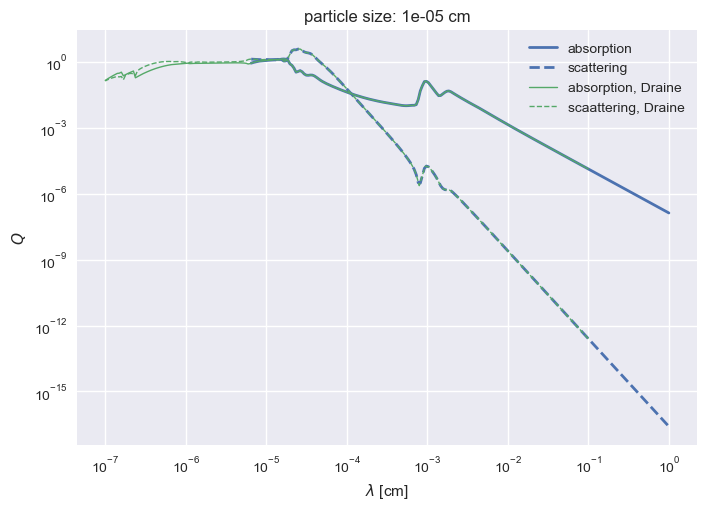

In [4]:
ia = 0
f, ax = plt.subplots()
line1, = ax.loglog(lam, res['q_abs'][ia, :], '-',      lw=2, label='absorption')
line2, = ax.loglog(lam, res['q_sca'][ia, :], '--',     lw=2, label='scattering', c=line1.get_color())
line3, = ax.loglog(draine[:,0]*1e-4, draine[:,1], '-', lw=1, label='absorption, Draine')
line4, = ax.loglog(draine[:,0]*1e-4, draine[:,2], '--',lw=1, label='scaattering, Draine', c=line3.get_color())

ax.set_title(f'particle size: {a[ia]:.2g} cm')
ax.set_ylabel('$Q$')
ax.set_xlabel('$\lambda$ [cm]')
ax.legend();

Calculate $\beta$ as function of $a_\mathrm{max}$:

kappa_abs @       1 mm for a_max = 1mm : 3.09 cm^2/g
kappa_abs @       3 mm for a_max = 1mm : 0.439 cm^2/g


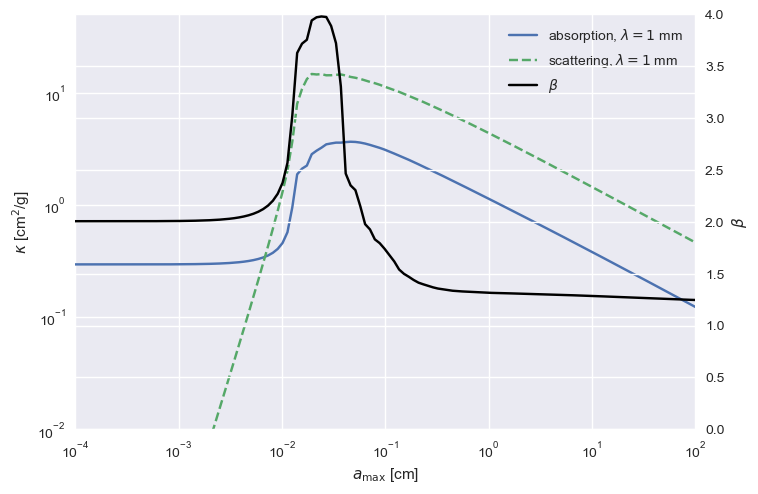

In [5]:
rho_s = 3.5
m     = 4.0 * np.pi / 3.0 * rho_s * a**3
k_abs, k_sca = opacity.get_kappa_from_q(a, m, res['q_abs'], res['q_sca'])

lam_avg = [0.1, 0.3]
res2 = opacity.size_average_opacity(lam_avg, a, lam, k_abs, k_sca, plot=True)
for ilam, _lam  in enumerate(lam_avg):
    print('kappa_abs @ {:7.3g} mm for a_max = 1mm : {:.3g} cm^2/g'.format(_lam * 10, np.interp(_lam, a, res2['ka'][ilam])))

-----------------------------------------
## Part 5: Test large grain extrapolation

For large size parameters (large grains and short wavelength), the Mie solution needs many terms. In this case, we can also use a direct extrapolation since we are in the geometric optics case. In this part, we compare those two approaches. Note that the opacity is quite accurate, but the asymmetry parameter $g$ is not.

The files were created in [smoothed_opacities.ipynb](smoothed_opacities.ipynb).

Imports for this part:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import dsharp_opac as opacity
import seaborn as sns
plt.style.use([{'figure.dpi':100, 'image.cmap':'rocket'}])

Loading the data

In [2]:
d      = np.load(opacity.get_datafile('default_opacities.npz'))
a      = d['a']
lam    = d['lam']
k_abs  = d['k_abs']
k_sca  = d['k_sca']

d2     = np.load(opacity.get_datafile('default_opacities_extrapol.npz'))
k_abs2 = d2['k_abs']
k_sca2 = d2['k_sca']

Plot the opacities and the errors

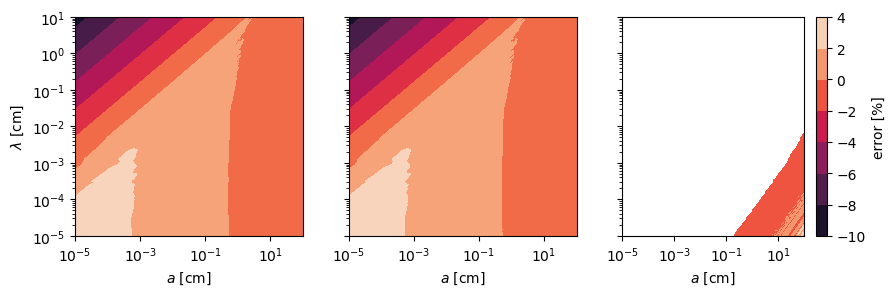

In [3]:
f, ax = plt.subplots(1,3, figsize=(10,3), sharex=True, sharey=True)

ax[0].contourf(a, lam, np.log10(k_sca.T))
ax[1].contourf(a, lam, np.log10(k_sca2.T))
for _a in ax:
    _a.set_xscale('log')
    _a.set_yscale('log')
    _a.set_xlabel('$a$ [cm]')
    
ax[0].set_ylabel('$\lambda$ [cm]')
    
err = k_sca/k_sca2-1
cc = ax[2].contourf(a, lam, np.ma.array(err*100, mask=err==0).T)
cb = plt.colorbar(cc)
cb.set_label('error [%]')
f.subplots_adjust(bottom=0.15, hspace=0)
f.savefig('opacitiy_comparison.pdf')

-------------------------------
## Part 6: Large Opacity Values

Here we try the separate ingredients to the Ricci et al. 2010 mix to find the cause of the large opacities

Imports for this part:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

import dsharp_opac as opacity
plt.style.use(['seaborn-ticks', {'figure.dpi': 100}])

Specify the original values as in the default case

In [2]:
c0 = opacity.diel_vacuum()
c1 = opacity.diel_warrenbrandt08()
c2 = opacity.diel_zubko96(extrapol=True, lmax=2)
c3 = opacity.diel_draine2003('astrosilicates')

constants = [c0, c1, c2, c3]

# after Luca Riccis thesis, the fractions in Ricci+2010 are typos

vol_fract = [0.30, 0.42, 0.21, 0.07]
densities = [0.00, 1.00, 2.50, 3.50]
rho_s = (np.array(vol_fract)*densities).sum()

Please cite Warren & Brandt (2008) when using these optical constants
Please cite Zubko et al. (1996) when using these optical constants
Please cite Draine 2003 when using these optical constants


Define size & wavelength grids for this part

In [3]:
a = np.logspace(np.log10(5e-7), 2, 150)
lam = np.logspace(np.log10(6.5e-6), 0, 206)

lam_obs = 0.087
a_max = 0.1

**Step 1:** Calculate the single compact material properties

Mie ... Done!
Water Ice (Warren & Brandt 2008) 0.87 mm opacity   1.9 cm^2/g
Mie ... Done!
Carbonaceous Grains (Zubko et al. 1996, ACH2) - extrapolated 0.87 mm opacity   7.1 cm^2/g
Mie ... Done!
Astronomical Silicates (Draine 2003) 0.87 mm opacity   3.7 cm^2/g


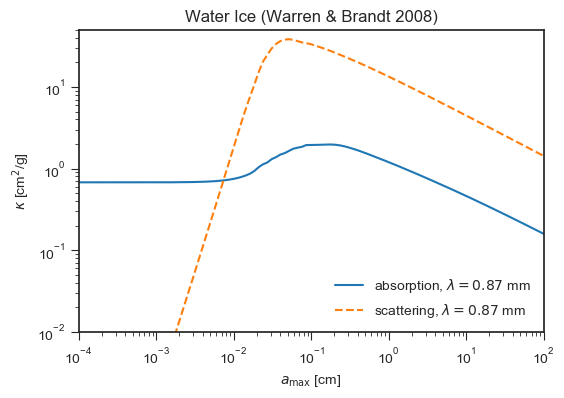

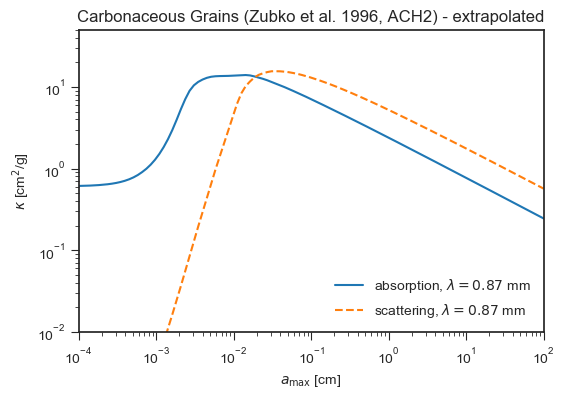

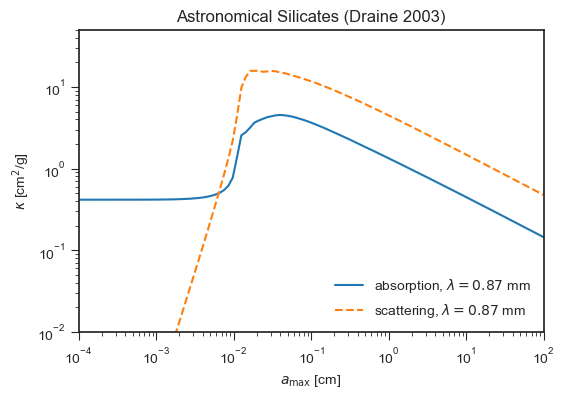

In [4]:
for rho, const in zip(densities, constants):

    if const.material_str == 'Vacuum':
        continue

    res   = opacity.get_opacities(a, lam, rho_s=rho, diel_const=const, extrapolate_large_grains=True)

    res2 = opacity.size_average_opacity(lam_obs, a, lam, res['k_abs'], res['k_sca'], plot=True);
    res2['ax1'].set_title(const.material_str)
    print('{} {:.2} mm opacity {:5.2g} cm^2/g'.format(const.material_str, lam_obs * 10,np.interp(a_max, a, res2['ka'][0])))

**Step 2:** Calculate the *compact/porous* version of the Ricci opacities using both mixing rules

Mie ... Done!
Bruggeman-Mix of 4 species 0.87 mm opacity    13 cm^2/g
using Maxwell-Garnett mixing: first component should be host material (= matrix)
    matrix = Vacuum
Mie ... Done!
Maxwell-Garnett-Mix of 4 species 0.87 mm opacity   1.9 cm^2/g
Mie ... Done!
Bruggeman-Mix of 3 species 0.87 mm opacity    24 cm^2/g
using Maxwell-Garnett mixing: first component should be host material (= matrix)
    matrix = Water Ice (Warren & Brandt 2008)
Mie ... Done!
Maxwell-Garnett-Mix of 3 species 0.87 mm opacity    16 cm^2/g


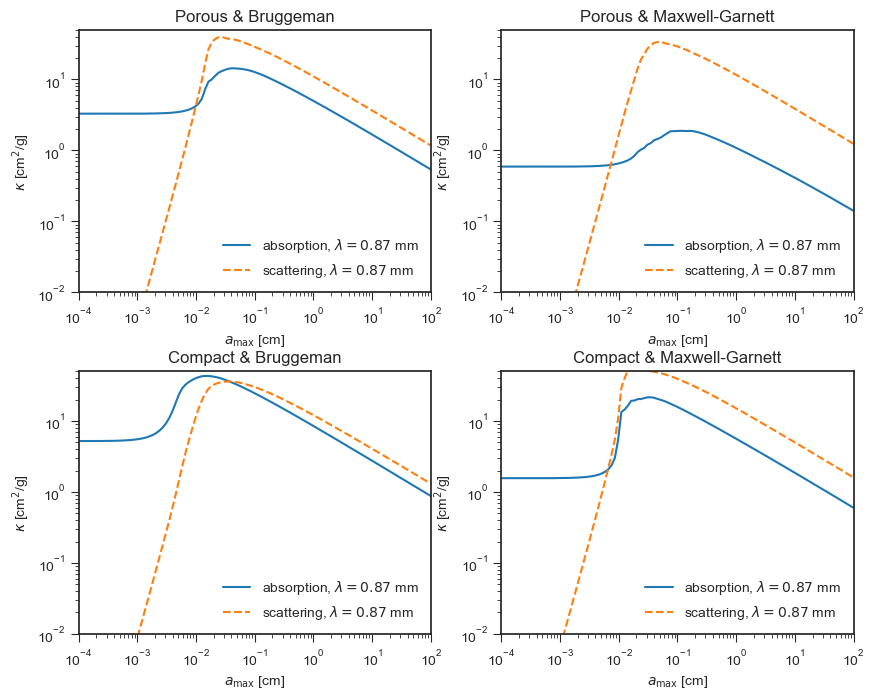

In [5]:
# the compact version of the mix

constants_comp = [c1, c2, c3]
vol_comp = np.array(vol_fract[:-1])
vol_comp /= vol_comp.sum()
rho_comp = (densities[:-1]*vol_comp).sum()

f, axs = plt.subplots(2, 2, figsize=(10,8))
f.subplots_adjust(hspace=0.3, wspace=0.2)
axs = axs.ravel()
i = 0

for S, V, C, R in zip(['Porous', 'Compact'], [vol_fract, vol_comp], [constants, constants_comp], [rho_s, rho_comp]):
    for rule in ['Bruggeman', 'Maxwell-Garnett']:
        ax = axs[i]

        dm = opacity.diel_mixed(C, V, rule=rule)
        res = opacity.get_opacities(a, lam, rho_s=R, diel_const=dm, extrapolate_large_grains=True)

        res2 = opacity.size_average_opacity(lam_obs, a, lam, res['k_abs'], res['k_sca'], plot=True, ax=ax)
        ax.set_title(S+' & '+rule)
        print('{} {:.2} mm opacity {:5.2g} cm^2/g'.format(dm.material_str, lam_obs *10, np.interp(a_max, a, res2['ka'][0])))
        i+=1

**Step 3:** Testing the Kataoka 2-step mixing process (1 MG mix of the materials, another MG mix of material and vacuum)

In [6]:
c0 = opacity.diel_vacuum()
c1 = opacity.diel_warrenbrandt08()
c2 = opacity.diel_zubko96(extrapol=True, lmax=2)
c3 = opacity.diel_draine2003('astrosilicates')

constants = [c0, c1, c2, c3]

# CASE 1 & 2: after Luca Riccis thesis, but without vacuum, both rules

vol_fract_1 = [0.00, 0.42, 0.21, 0.07]
vol_fract_1 = vol_fract_1/np.array(vol_fract_1).sum()
densities   = [0.00, 1.00, 2.50, 3.50]
rho_s_1     = (np.array(vol_fract_1) * densities).sum()

# first step: mix with both rules

mix_a_1 = opacity.diel_mixed(constants, vol_fract_1, rule='Maxwell-Garnett')
mix_b_1 = opacity.diel_mixed(constants, vol_fract_1, rule='Bruggeman')

# second step: now mix this with vacuum as "matrix"

vol_fract_2 = [0.3, 0.7]
densities_2 = [0.0, rho_s_1]
rho_s_a     = (np.array(vol_fract_2)*densities_2).sum()

mix_a = opacity.diel_mixed([opacity.diel_vacuum(), mix_a_1], vol_fract_2, rule='Maxwell-Garnett')
mix_b = opacity.diel_mixed([opacity.diel_vacuum(), mix_b_1], vol_fract_2, rule='Maxwell-Garnett')

# CASE 3 & 4: we mix porosity in from the beginning with both rules

vol_fract_c = [0.30, 0.42, 0.21, 0.07]
rho_s_c     = (np.array(vol_fract_c)*densities).sum()
mix_c       = opacity.diel_mixed(constants, vol_fract_c, rule='Maxwell-Garnett')
mix_d       = opacity.diel_mixed(constants, vol_fract_c, rule='Bruggeman')

# calculate the opacities

res_a = opacity.get_opacities(a, lam, rho_s=rho_s_a, diel_const=mix_a, extrapolate_large_grains=True)
res_b = opacity.get_opacities(a, lam, rho_s=rho_s_a, diel_const=mix_b, extrapolate_large_grains=True)
res_c = opacity.get_opacities(a, lam, rho_s=rho_s_c, diel_const=mix_c, extrapolate_large_grains=True)
res_d = opacity.get_opacities(a, lam, rho_s=rho_s_c, diel_const=mix_d, extrapolate_large_grains=True)

# a fifth case, where we do a mass weighted mix of optical constants

fm = densities/rho_s_c * vol_fract_c

res_1 = opacity.get_opacities(a, lam, rho_s=densities[1], diel_const=c1, extrapolate_large_grains=True)
res_2 = opacity.get_opacities(a, lam, rho_s=densities[2], diel_const=c2, extrapolate_large_grains=True)
res_3 = opacity.get_opacities(a, lam, rho_s=densities[3], diel_const=c3, extrapolate_large_grains=True)

k_a_mw = fm[1]*res_1['k_abs'] + fm[2]*res_2['k_abs'] + fm[3]*res_3['k_abs']
k_s_mw = fm[1]*res_1['k_sca'] + fm[2]*res_2['k_sca'] + fm[3]*res_3['k_sca']

Please cite Warren & Brandt (2008) when using these optical constants
Please cite Zubko et al. (1996) when using these optical constants
Please cite Draine 2003 when using these optical constants
using Maxwell-Garnett mixing: first component should be host material (= matrix)
    matrix = Vacuum
using Maxwell-Garnett mixing: first component should be host material (= matrix)
    matrix = Vacuum
using Maxwell-Garnett mixing: first component should be host material (= matrix)
    matrix = Vacuum
using Maxwell-Garnett mixing: first component should be host material (= matrix)
    matrix = Vacuum
Mie ... Done!
Mie ... Done!
Mie ... Done!
Mie ... Done!
Mie ... Done!
Mie ... Done!
Mie ... Done!


Plot the resulting size average opacities as function of $a_\mathrm{max}$

Maxwell-Garnett-Mix of 2 species 0.87 mm opacity   1.9 cm^2/g
Maxwell-Garnett-Mix of 2 species 0.87 mm opacity    13 cm^2/g
Maxwell-Garnett-Mix of 4 species 0.87 mm opacity   1.9 cm^2/g
Bruggeman-Mix of 4 species 0.87 mm opacity    13 cm^2/g
mass weighted 0.87 mm opacity   4.6 cm^2/g


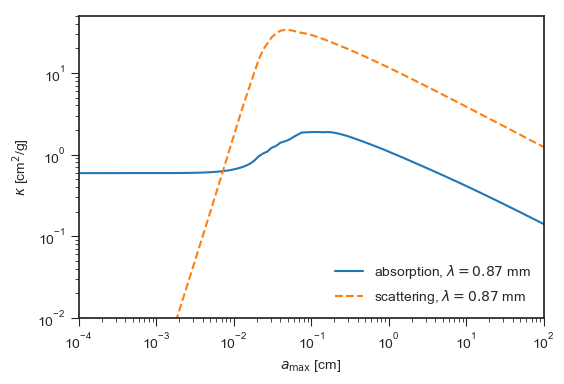

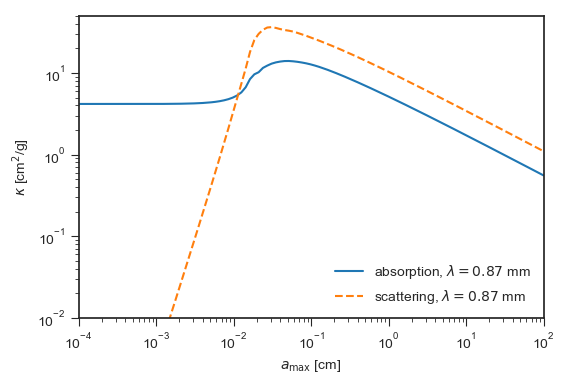

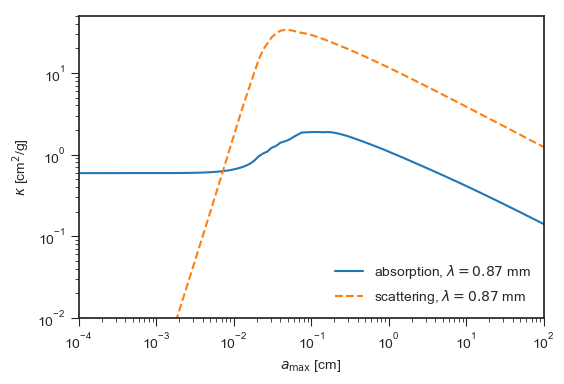

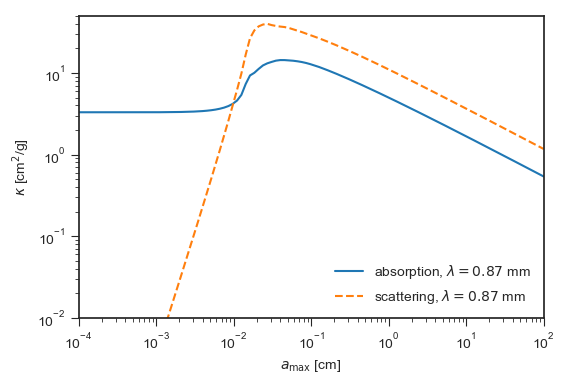

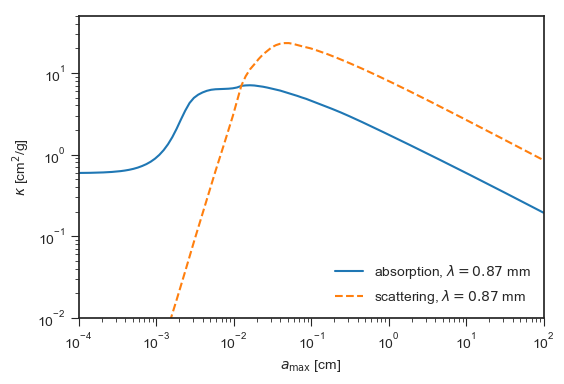

In [7]:
mean_a = opacity.size_average_opacity(lam_obs, a, lam, res_a['k_abs'], res_a['k_sca'], plot=True)
print('{} {:.2} mm opacity {:5.2g} cm^2/g'.format(mix_a.material_str, lam_obs * 10, np.interp(a_max, a, mean_a['ka'][0])))
ax.set_title('First MG for materials, then MG for vacuum')
plt.savefig('1.pdf')

mean_b = opacity.size_average_opacity(lam_obs, a, lam, res_b['k_abs'], res_b['k_sca'], plot=True)
print('{} {:.2} mm opacity {:5.2g} cm^2/g'.format(mix_b.material_str, lam_obs * 10, np.interp(a_max, a, mean_b['ka'][0])))
ax.set_title('First B for materials, then MG for vacuum')
plt.savefig('2.pdf')

mean_c = opacity.size_average_opacity(lam_obs, a, lam, res_c['k_abs'], res_c['k_sca'], plot=True)
print('{} {:.2} mm opacity {:5.2g} cm^2/g'.format(mix_c.material_str, lam_obs * 10, np.interp(a_max, a, mean_c['ka'][0])))
ax.set_title('MG with vacuum as matrix')
plt.savefig('3.pdf')

mean_d = opacity.size_average_opacity(lam_obs, a, lam, res_d['k_abs'], res_d['k_sca'], plot=True)
print('{} {:.2} mm opacity {:5.2g} cm^2/g'.format(mix_d.material_str, lam_obs * 10, np.interp(a_max, a, mean_d['ka'][0])))
ax.set_title('B rule mixing everything')
plt.savefig('4.pdf')

mean_mw = opacity.size_average_opacity(lam_obs, a, lam, k_a_mw, k_s_mw, plot=True)
print('{} {:.2} mm opacity {:5.2g} cm^2/g'.format('mass weighted', lam_obs * 10, np.interp(a_max, a, mean_mw['ka'][0])))
ax.set_title('mass weighted')
plt.savefig('5.pdf')

**Step 4:** A **very rough** try to reproduce the WD2001 mix

Download one of the [Weingartner & Draine 2001](https://dx.doi.org/10.1086/318651) dust models

In [8]:
from urllib.request import urlopen
with urlopen('ftp://ftp.astro.princeton.edu/draine/dust/mix/kext_albedo_WD_MW_3.1_60') as f:
    while not f.readline().decode().startswith('--------'):
        pass
    lam_dr,_,_,_,k_dr = np.loadtxt(f).T

We also use a grain size distribution with a similar extent as in the WD01 paper, but we use just MRN slope instead of the more complex size distributions from their paper.

In [9]:
aMRN = np.logspace(np.log10(3.5e-8), np.log10(1e-4), 100)

# for silicates, graphite

rho   = [3.5, 2.24]
v     = [0.59, 0.41]
rho_d = (np.array(v)*rho).sum()

# get the silicates and extrapolate

draine_sil = opacity.diel_WeingartnerDraine2001_astrosil()
draine_sil.extrapolate_constants_up(0.05,1,kind='linear')

# mix the graphite grains

draine_c1  = opacity.diel_draine2003('graphite', parallel=False, a='0.01')
draine_c2  = opacity.diel_draine2003('graphite', parallel=True, a='0.01')
draine_c   = opacity.diel_mixed([draine_c1, draine_c2], [2. / 3, 1. / 3], rule='Maxwell-Garnett')

# mix the graphite with the silicates

draine     = opacity.diel_mixed([draine_sil, draine_c], v, rule='Maxwell-Garnett')
res_draine = opacity.get_opacities(aMRN, lam, rho_s=rho_d, diel_const=draine, extrapolate_large_grains=True)

# make a mass weighted pseudo-WD opacity

res_draine_s = opacity.get_opacities(aMRN, lam, rho_s=rho[0], diel_const=draine_sil, extrapolate_large_grains=True)
res_draine_c = opacity.get_opacities(aMRN, lam, rho_s=rho[1], diel_const=draine_c, extrapolate_large_grains=True)

# a mrn-size distribution and size average

s_draine = aMRN**0.5
s_draine = s_draine/s_draine.sum()

k_draine_s = (res_draine_s['k_abs'] * s_draine[:, None]).sum(0)
k_draine_c = (res_draine_c['k_abs'] * s_draine[:, None]).sum(0)

# now a mass weighted sum

fm_draine = rho/rho_d*v
k_d_mw = k_draine_s*fm_draine[0] + k_draine_c * fm_draine[1]

Please cite Weingartner & Draine (2001) when using these optical constants
Please cite Draine 2003 when using these optical constants
Please cite Draine 2003 when using these optical constants
using Maxwell-Garnett mixing: first component should be host material (= matrix)
    matrix = Graphite, pe, a=0.01 mu (Laor & Draine 1993)
using Maxwell-Garnett mixing: first component should be host material (= matrix)
    matrix = Astronomical Silicates (Weingartner & Draine 2001) - extrapolated
Mie ... Done!
Mie ... Done!
Mie ... Done!


**Step 5:** Plot all of those tests in a similar way as Fig. 3 of [Andrews et al. 2009](https://dx.doi.org/10.1088/0004-637X/700/2/1502).

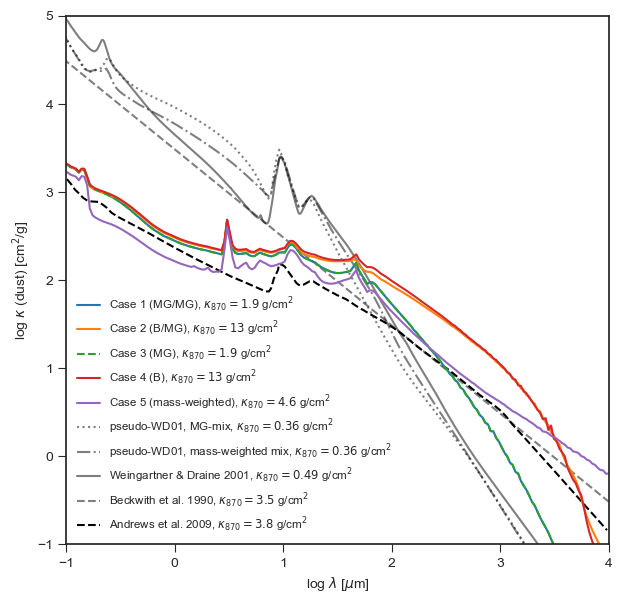

In [10]:
# a 1g-normalized size distribution (bin-integrated) up to 1 mm

s = a**0.5
s[a>0.1]=0
s= s/s.sum()

# size average all the absorption opacities

k1 = (res_a['k_abs'] * s[:,None]).sum(0)
k2 = (res_b['k_abs'] * s[:,None]).sum(0)
k3 = (res_c['k_abs'] * s[:,None]).sum(0)
k4 = (res_d['k_abs'] * s[:,None]).sum(0)
k5 = (k_a_mw * s[:,None]).sum(0)
kd = (res_draine['k_abs'] * s_draine[:,None]).sum(0)
kb = 3.5*(lam/0.087)**(-1)  # Beckwith 1990

la,ka = np.loadtxt(opacity.get_datafile('andrews2009.dat')).T

f, ax = plt.subplots(figsize=(7,7))

ax.plot(np.log10(1e4*lam), np.log10(k1),       label='Case 1 (MG/MG), $\kappa_{{{:.0f}}} = {:3.2g}$ g/cm$^2$'.format(        lam_obs*1e4, np.interp(lam_obs,lam,k1)))
ax.plot(np.log10(1e4*lam), np.log10(k2),       label='Case 2 (B/MG), $\kappa_{{{:.0f}}} = {:3.2g}$ g/cm$^2$'.format(         lam_obs*1e4, np.interp(lam_obs,lam,k2)))
ax.plot(np.log10(1e4*lam), np.log10(k3), '--', label='Case 3 (MG), $\kappa_{{{:.0f}}} = {:3.2g}$ g/cm$^2$'.format(           lam_obs*1e4, np.interp(lam_obs,lam,k3)))
ax.plot(np.log10(1e4*lam), np.log10(k4),       label='Case 4 (B), $\kappa_{{{:.0f}}} = {:3.2g}$ g/cm$^2$'.format(            lam_obs*1e4, np.interp(lam_obs,lam,k4)))
ax.plot(np.log10(1e4*lam), np.log10(k5),       label='Case 5 (mass-weighted), $\kappa_{{{:.0f}}} = {:3.2g}$ g/cm$^2$'.format(lam_obs*1e4, np.interp(lam_obs,lam,k5)))

ax.plot(np.log10(1e4*lam), np.log10(kd),     'k:',  zorder=-100, alpha=0.5, label='pseudo-WD01, MG-mix, $\kappa_{{{:.0f}}} = {:3.2g}$ g/cm$^2$'.format(           lam_obs*1e4, np.interp(lam_obs,lam,kd)))
ax.plot(np.log10(1e4*lam), np.log10(k_d_mw), 'k-.', zorder=-100, alpha=0.5, label='pseudo-WD01, mass-weighted mix, $\kappa_{{{:.0f}}} = {:3.2g}$ g/cm$^2$'.format(lam_obs*1e4, np.interp(lam_obs,lam,k_d_mw)))
ax.plot(np.log10(lam_dr),  np.log10(k_dr),   'k',   zorder=-100, alpha=0.5, label='Weingartner & Draine 2001, $\kappa_{{{:.0f}}} = {:3.2g}$ g/cm$^2$'.format(     lam_obs*1e4, np.interp(lam_obs*1e4,lam_dr,k_dr)))
ax.plot(np.log10(1e4*lam), np.log10(kb),     'k--', zorder=-100, alpha=0.5, label='Beckwith et al. 1990, $\kappa_{{{:.0f}}} = {:3.2g}$ g/cm$^2$'.format(          lam_obs*1e4, np.interp(lam_obs,lam,kb)))
ax.plot(np.log10(la),      np.log10(ka),     'k--', zorder=-100, alpha=1.0, label='Andrews et al. 2009, $\kappa_{{{:.0f}}} = {:3.2g}$ g/cm$^2$'.format(           lam_obs*1e4, np.interp(lam_obs*1e4,la,ka)))

ax.legend(loc=3, fontsize='small')
ax.set_xlim(-1,4)
ax.set_ylim(-1,5)
ax.set_xlabel('log $\lambda$ [$\mu$m]')
ax.set_ylabel('log $\kappa$ (dust) [cm$^2$/g]')
plt.savefig('andrews09-like.pdf')

-------------------------
## Part 7: Bruggeman Test

Check if Bruggeman solution works

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import dsharp_opac as opacity
plt.style.use(['seaborn-ticks', {'figure.dpi': 100}])
from mpmath import findroot

We use the Ricci mix, but without porosity

In [2]:
c1 = opacity.diel_draine2003('astrosilicates')
c2 = opacity.diel_zubko96(extrapol=True, lmax=2)
c3 = opacity.diel_warrenbrandt08()

constants = [c1, c2, c3]

# after Luca Riccis thesis, the fractions in Ricci+2010 are typos

vol_fract = [0.1, 0.3, 0.6]
densities = [3.50, 2.50, 1.00]

mix_b = opacity.diel_mixed(constants, vol_fract, rule='Bruggeman')
mix_m = opacity.diel_mixed(constants, vol_fract, rule='Maxwell-Garnett')
rho_s = sum(densities * np.array(vol_fract))

Please cite Draine 2003 when using these optical constants
Please cite Zubko et al. (1996) when using these optical constants
Please cite Warren & Brandt (2008) when using these optical constants
using Maxwell-Garnett mixing: first component should be host material (= matrix)
    matrix = Astronomical Silicates (Draine 2003)


(0, 2)

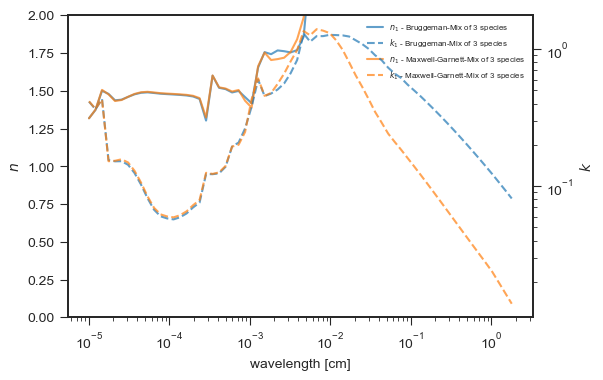

In [3]:
axs=opacity.compare_nk([mix_b, mix_m])
axs[0].set_ylim(0,2)

eps_mean = (19.07538742869003+4.610342435968294j)


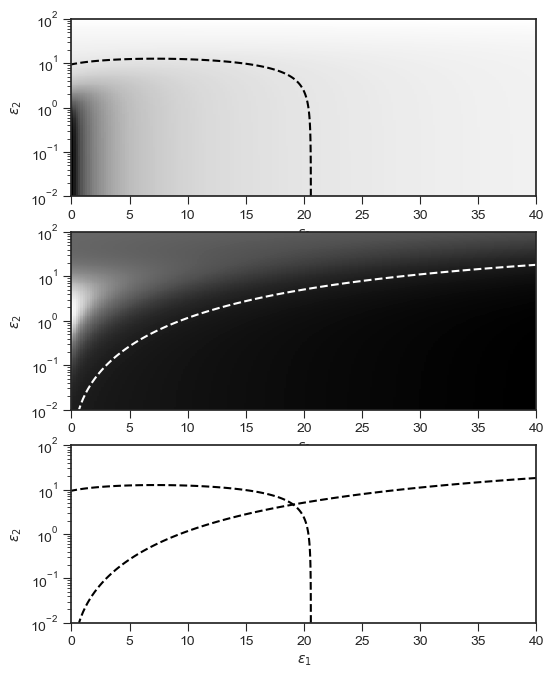

In [4]:
lam_obs = 0.1

eps = np.array([complex(*c.nk(lam_obs))**2 for c in constants])

def fct(x):
    return sum(vol_fract * ((eps - x) / (eps + 2 * x)))
eps_mean = complex(findroot(fct, complex(0.5, 0.5)))

f, ax = plt.subplots(3,1, figsize=(6,8))

eps1 = np.linspace(0,40,200)
eps2 = np.logspace(-2,2,200)

EPS1,EPS2 = np.meshgrid(eps1, eps2)

F = np.vectorize(fct)(EPS1+1j*EPS2)

ax[0].pcolormesh(EPS1, EPS2, F.real)
ax[0].contour(EPS1, EPS2, F.real, [0], colors='k', linestyles='--')
ax[0].set_yscale('log')

ax[1].pcolormesh(EPS1, EPS2, F.imag)
ax[1].contour(EPS1, EPS2, F.imag, [0], colors='w', linestyles='--')
ax[1].set_yscale('log')


ax[2].contour(EPS1, EPS2, F.real, [0], colors='k', linestyles='--')
ax[2].contour(EPS1, EPS2, F.imag, [0], colors='k', linestyles='--')
ax[2].set_yscale('log')

for a in ax:
    a.set_xlabel('$\epsilon_1$')
    a.set_ylabel('$\epsilon_2$')
    
print('eps_mean = {}'.format(eps_mean))

----------------------------
## Part 8: Kataoka Opacities

Here we try to reproduce the results from [Kataoka et al. 2014](https://dx.doi.org/10.1051/0004-6361/201323199).

Based on their section 2.1, the density of the mix should be 1.28 g/cm$^3$, not 1.68 g/cm$^3$ as they write. Perhaps a typo 2$\rightarrow$6?

Imports for this part:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

import dsharp_opac as opacity
plt.style.use(['seaborn-ticks', {'figure.dpi': 100}])

Specify the optical constants and the mixing coefficients. Note that we make two of each material to compare after extrapolation. We also use the more recent Draine 2003 optical constants for astrosilicates instead of the Weingartner & Draine 2001, which don't extend as much to long wavelengths.

In [2]:
c0  = opacity.diel_vacuum()

c1i = opacity.diel_draine2003('astrosilicates')
c1  = opacity.diel_draine2003('astrosilicates')
c2i = opacity.diel_henning('organics', new=False)
c2  = opacity.diel_henning('organics', new=False)
c3i = opacity.diel_warren84()
c3  = opacity.diel_warren84()

constants = [c0,  c1,      c2,      c3]
m_fract   = [0,   2.64e-3, 3.53e-3, 5.55e-3]
densities = [0.0, 3.50,    1.50,    0.92]
vol_fract = [0.0, 0.08,    0.26,    0.66]

#vol_fract = [0.1, 0.07,    0.23,    0.60] # that's like Kataoka, but added 10% vacuum

rho_s = (np.array(vol_fract)*densities).sum()

Please cite Draine 2003 when using these optical constants
Please cite Draine 2003 when using these optical constants
Reading opacities from organics
Please cite Henning & Stognienko (1996), Pollack et al. (1994) when using these optical constants
Reading opacities from organics
Please cite Henning & Stognienko (1996), Pollack et al. (1994) when using these optical constants
Please cite Warren (1984) when using these optical constants
Please cite Warren (1984) when using these optical constants


Extrapolate the optical constants

In [3]:
c1.extrapolate_constants_up(0.05,1e5, kind='linear')
c2.extrapolate_constants_up(1, 1e5, kind='linear')
c3.extrapolate_constants_up(100, 1e5, kind='linear')

Plot the optical properties and check the extrapolation

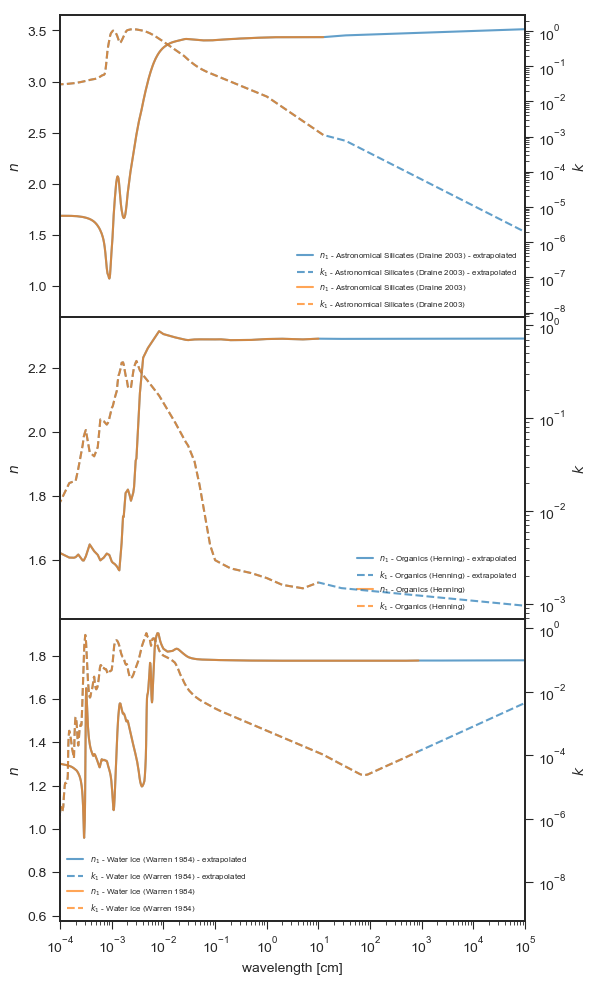

In [4]:
f, axs = plt.subplots(3, 1, figsize=(6, 12), sharex=True)

opacity.compare_nk([c1, c1i], orig_data=True, ax=axs[0], twoaxes=True)
opacity.compare_nk([c2, c2i], orig_data=True, ax=axs[1], twoaxes=True)
opacity.compare_nk([c3, c3i], orig_data=True, ax=axs[2], twoaxes=True)
axs[0].set_xlim(1e-4, 1e5)
f.subplots_adjust(hspace=0)

Define size & wavelength grids for this part

In [5]:
a = np.logspace(np.log10(5e-7), 2, 150)
lam = np.logspace(0, 5, 206)

In [6]:
mix1 = opacity.diel_mixed(constants, vol_fract, rule='Maxwell-Garnett')
mix1 = mix1.get_normal_object()

mix2 = opacity.diel_mixed(constants, vol_fract, rule='Bruggeman')
mix2 = mix2.get_normal_object()

mix_k = opacity.diel_from_lnk_file(opacity.get_datafile('kataoka_mix.lnk'), headerlines=5)

using Maxwell-Garnett mixing: first component should be host material (= matrix)
    matrix = Vacuum


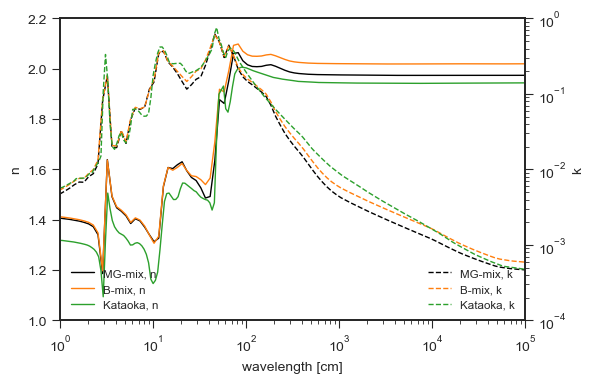

In [7]:
f, ax1 = plt.subplots()
ax1.semilogx(mix1._l * 1e4, mix1._n,   'k-', lw=1, label='MG-mix, n')
ax1.semilogx(mix2._l * 1e4, mix2._n,   'C1-', lw=1, label='B-mix, n')
ax1.semilogx(mix_k._l * 1e4, mix_k._n, 'C2-', lw=1, label='Kataoka, n')
ax1.legend(fontsize='small', loc=3)
ax1.set_xlim(1e0, 1e5)
ax1.set_ylim(1e0, 2.2)

ax2 = plt.twinx(ax1)
ax2.loglog(mix1._l * 1e4, mix1._k,   'k--', lw=1, label='MG-mix, k')
ax2.loglog(mix2._l * 1e4, mix2._k,   'C1--', lw=1, label='B-mix, k')
ax2.loglog(mix_k._l * 1e4, mix_k._k, 'C2--', lw=1, label='Kataoka, k')
ax2.legend(fontsize='small', loc=4)
ax2.set_ylim(1e-4, 1e0)

ax1.set_xlabel('wavelength [cm]')
ax1.set_ylabel('n')
ax2.set_ylabel('k')
plt.savefig('comparison.pdf');

------------------------------------
## Part 9: Carbonaceous Dust and Water

Here we overplot the various optical constants for carbonaceous materials and for water(s)

Imports for this part:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import dsharp_opac as opacity
plt.style.use(['seaborn-ticks', {'figure.dpi': 100}])

Please cite Zubko et al. (1996) when using these optical constants
Please cite Zubko et al. (1996) when using these optical constants
Reading opacities from cel400.lnk
Please cite Jaeger et al. 1998 when using these optical constants
Reading opacities from cel600.lnk
Please cite Jaeger et al. 1998 when using these optical constants
Reading opacities from cel800.lnk
Please cite Jaeger et al. 1998 when using these optical constants
Reading opacities from cel1000.lnk
Please cite Jaeger et al. 1998 when using these optical constants
Reading opacities from acneu.lnk
Please cite Preibisch et al. 1993 when using these optical constants


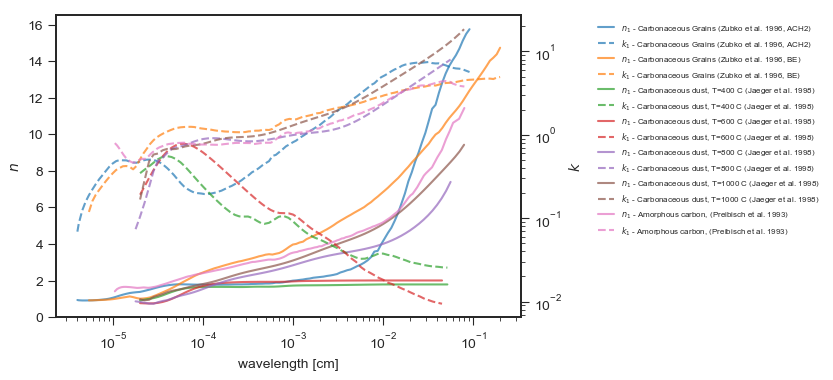

In [2]:
c1 = []
c1 += [opacity.diel_zubko96(extrapol=False)]
c1 += [opacity.diel_zubko96(extrapol=False, sample='BE')]
c1 += [opacity.diel_jaeger98(T=400)]
c1 += [opacity.diel_jaeger98(T=600)]
c1 += [opacity.diel_jaeger98(T=800)]
c1 += [opacity.diel_jaeger98(T=1000)]
c1 += [opacity.diel_preibisch93('amorphous carbon')]

ax1 = opacity.compare_nk(c1, orig_data=True)[0]
ax1.get_legend().set_bbox_to_anchor((1.15,1.))

Compare water constants

Please cite Warren (1984) when using these optical constants
Please cite Warren & Brandt (2008) when using these optical constants
Reading opacities from watericek
Please cite Henning & Stognienko (1996) when using these optical constants
Reading opacities from P94-waterice.lnk
Please cite Pollack et al. (1994) when using these optical constants


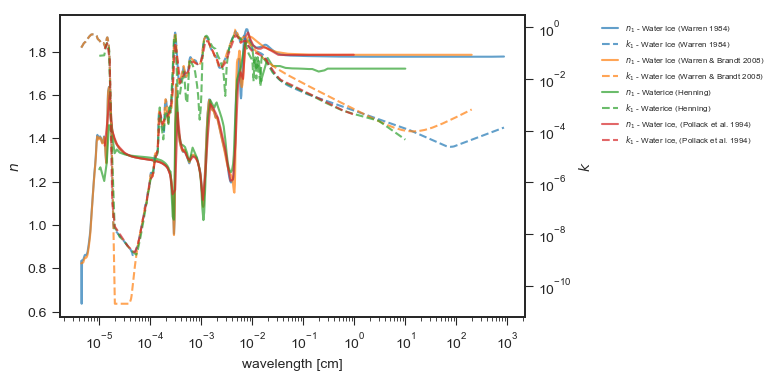

In [3]:
c1 = []
c1 += [opacity.diel_warren84()]
c1 += [opacity.diel_warrenbrandt08()]
c1 += [opacity.diel_henning('waterice')]
c1 += [opacity.diel_pollack1994('water ice')]

ax1 = opacity.compare_nk(c1, orig_data=True)[0]
ax1.get_legend().set_bbox_to_anchor((1.15,1.))